# Solar Eclipse Classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import timedelta
import re
from sklearn.metrics import accuracy_score
from datetime import datetime

In [2]:
train_df=pd.read_csv("../DataSets/Solar-Eclipse/train.csv")
train_df

,Unnamed: 0,Catalog Number,Calendar Date,Eclipse Time,Delta T (s),Lunation Number,Saros Number,Eclipse Type,Gamma,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
0,0,1,-1999 June 12,3:14:51,NaN,-49456,NaN,T,NaN,NaN,6.0N,33.3W,NaN,344,247,06m37s
1,1,2,-1999 December 5,23:45:23,46426.0,-49450,10.0,A,-0.2317,0.9382,32.9S,10.8E,76.0,21,236,06m44s
2,2,3,-1998 June 1,18:09:16,46415.0,-49444,15.0,T,0.4994,1.0284,46.2N,83.4E,60.0,151,111,02m15s
3,3,4,-1998 November 25,5:57:03,46403.0,-49438,20.0,A,-0.9045,0.9806,67.8S,143.8W,25.0,74,162,01m14s
4,4,5,-1997 April 22,13:19:56,46393.0,-49433,-13.0,P,-1.4670,0.1611,60.6S,106.4W,0.0,281,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9513,9513,9514,2002 December 4,7:32:16,64.0,36,142.0,T,-0.3020,1.0244,39.5S,59.6E,72.0,16,87,02m04s
9514,9514,9515,2003 May 31,4:09:22,64.0,42,147.0,An,0.9960,0.9384,66.6N,24.5W,3.0,35,-,03m37s
9515,9515,9516,2003 November 23,22:50:22,64.0,48,152.0,T,-0.9638,1.0379,72.7S,88.4E,15.0,111,495,01m57s
9516,9516,9517,2004 April 19,13:35:05,65.0,53,119.0,P,-1.1335,0.7367,61.6S,44.3E,0.0,295,NaN,NaN


In [3]:
test_df=pd.read_csv("../DataSets/Solar-Eclipse/test.csv")
test_df

,Unnamed: 0,Catalog Number,Calendar Date,Eclipse Time,Delta T (s),Lunation Number,Saros Number,Eclipse Type,Gamma,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
0,9518,9519,2005 April 8,20:36:51,65.0,65,129.0,H,-0.3473,1.0074,10.6S,119.0W,70.0,332,27,00m42s
1,9519,9520,2005 October 3,10:32:47,65.0,71,134.0,A,0.3306,0.9576,12.9N,28.7E,71.0,209,162,04m32s
2,9520,9521,2006 March 29,10:12:23,65.0,77,139.0,T,0.3843,1.0515,23.2N,16.7E,67.0,149,184,04m07s
3,9521,9522,2006 September 22,11:41:16,65.0,83,144.0,A,-0.4062,0.9352,20.6S,9.1W,66.0,31,261,07m09s
4,9522,9523,2007 March 19,2:32:57,65.0,89,149.0,P,1.0728,0.8756,61.0N,55.5E,0.0,92,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375,11893,11894,2998 December 10,3:18:31,4414.0,12355,187.0,P,1.2838,0.4773,67.2N,145.0E,0.0,179,NaN,NaN
2376,11894,11895,2999 May 6,23:23:57,4417.0,12360,154.0,T,0.8388,1.0566,71.5N,177.3E,33.0,146,345,03m25s
2377,11895,11896,2999 October 30,9:34:33,4420.0,12366,159.0,A-,-1.0023,0.9586,70.9S,84.7W,0.0,137,-,-
2378,11896,11897,3000 April 26,14:18:06,4424.0,12372,164.0,T,0.1310,1.0222,21.1N,18.4W,82.0,166,76,02m11s


### Concatenating both the training and test set

In [4]:
frames = [train_df, test_df]
df = pd.concat(frames, sort=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11898 entries, 0 to 2379
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         11898 non-null  int64  
 1   Catalog Number     11898 non-null  int64  
 2   Calendar Date      11898 non-null  object 
 3   Eclipse Time       11898 non-null  object 
 4   Delta T (s)        11874 non-null  float64
 5   Lunation Number    11898 non-null  int64  
 6   Saros Number       11886 non-null  float64
 7   Eclipse Type       11898 non-null  object 
 8   Gamma              11878 non-null  float64
 9   Eclipse Magnitude  11868 non-null  float64
 10  Latitude           11898 non-null  object 
 11  Longitude          11898 non-null  object 
 12  Sun Altitude       11881 non-null  float64
 13  Sun Azimuth        11898 non-null  int64  
 14  Path Width (km)    7698 non-null   object 
 15  Central Duration   7698 non-null   object 
dtypes: float64(5), int64(4)

In [6]:
df.shape

(11898, 16)

In [7]:
df.columns

Index(['Unnamed: 0', 'Catalog Number', 'Calendar Date', 'Eclipse Time',
       'Delta T (s)', 'Lunation Number', 'Saros Number', 'Eclipse Type',
       'Gamma', 'Eclipse Magnitude', 'Latitude', 'Longitude', 'Sun Altitude',
       'Sun Azimuth', 'Path Width (km)', 'Central Duration'],
      dtype='object')

In [8]:
df.columns = df.columns.str.replace(' ','_') # replacing space between words with underscore
df.columns

Index(['Unnamed:_0', 'Catalog_Number', 'Calendar_Date', 'Eclipse_Time',
       'Delta_T_(s)', 'Lunation_Number', 'Saros_Number', 'Eclipse_Type',
       'Gamma', 'Eclipse_Magnitude', 'Latitude', 'Longitude', 'Sun_Altitude',
       'Sun_Azimuth', 'Path_Width_(km)', 'Central_Duration'],
      dtype='object')

In [9]:
df.dtypes

Unnamed:_0             int64
Catalog_Number         int64
Calendar_Date         object
Eclipse_Time          object
Delta_T_(s)          float64
Lunation_Number        int64
Saros_Number         float64
Eclipse_Type          object
Gamma                float64
Eclipse_Magnitude    float64
Latitude              object
Longitude             object
Sun_Altitude         float64
Sun_Azimuth            int64
Path_Width_(km)       object
Central_Duration      object
dtype: object

### Dealing with null values

In [10]:
df.isnull().sum()

Unnamed:_0              0
Catalog_Number          0
Calendar_Date           0
Eclipse_Time            0
Delta_T_(s)            24
Lunation_Number         0
Saros_Number           12
Eclipse_Type            0
Gamma                  20
Eclipse_Magnitude      30
Latitude                0
Longitude               0
Sun_Altitude           17
Sun_Azimuth             0
Path_Width_(km)      4200
Central_Duration     4200
dtype: int64

In [11]:
df = df.dropna(axis=0, subset=['Delta_T_(s)','Saros_Number','Gamma','Eclipse_Magnitude','Sun_Altitude'])

In [12]:
df.isnull().sum()

Unnamed:_0              0
Catalog_Number          0
Calendar_Date           0
Eclipse_Time            0
Delta_T_(s)             0
Lunation_Number         0
Saros_Number            0
Eclipse_Type            0
Gamma                   0
Eclipse_Magnitude       0
Latitude                0
Longitude               0
Sun_Altitude            0
Sun_Azimuth             0
Path_Width_(km)      4183
Central_Duration     4183
dtype: int64

In [13]:
df.drop(['Unnamed:_0','Catalog_Number'],axis=1,inplace=True)

In [14]:
for i in ['Path_Width_(km)','Central_Duration']:
  df[i].fillna('0',inplace=True)

In [15]:
df

,Calendar_Date,Eclipse_Time,Delta_T_(s),Lunation_Number,Saros_Number,Eclipse_Type,Gamma,Eclipse_Magnitude,Latitude,Longitude,Sun_Altitude,Sun_Azimuth,Path_Width_(km),Central_Duration
1,-1999 December 5,23:45:23,46426.0,-49450,10.0,A,-0.2317,0.9382,32.9S,10.8E,76.0,21,236,06m44s
2,-1998 June 1,18:09:16,46415.0,-49444,15.0,T,0.4994,1.0284,46.2N,83.4E,60.0,151,111,02m15s
3,-1998 November 25,5:57:03,46403.0,-49438,20.0,A,-0.9045,0.9806,67.8S,143.8W,25.0,74,162,01m14s
4,-1997 April 22,13:19:56,46393.0,-49433,-13.0,P,-1.4670,0.1611,60.6S,106.4W,0.0,281,0,0
5,-1997 May 22,2:45:35,46391.0,-49432,25.0,P,1.3253,0.4035,61.7N,151.7W,0.0,55,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375,2998 December 10,3:18:31,4414.0,12355,187.0,P,1.2838,0.4773,67.2N,145.0E,0.0,179,0,0
2376,2999 May 6,23:23:57,4417.0,12360,154.0,T,0.8388,1.0566,71.5N,177.3E,33.0,146,345,03m25s
2377,2999 October 30,9:34:33,4420.0,12366,159.0,A-,-1.0023,0.9586,70.9S,84.7W,0.0,137,-,-
2378,3000 April 26,14:18:06,4424.0,12372,164.0,T,0.1310,1.0222,21.1N,18.4W,82.0,166,76,02m11s


### Dealing with the target variable and extracting only the main types of eclipses

In [16]:
df['Eclipse_Type'].value_counts()

P     3859
A     3730
T     3030
H      501
Pb     163
Pe     161
Tm      72
Am      71
An      36
A+      34
A-      34
H3      26
H2      24
As      24
Hm      17
T-      17
Tn      14
Ts      12
T+       9
Name: Eclipse_Type, dtype: int64

In [17]:
def EclipseClean(x):  # taking only main 4 types of lunar eclipse: P, A, T, H 
    if 'P' in x:
        return('P')
    if 'A' in x:
        return('A')
    if 'T' in x:
        return('T')
    if 'H' in x:
        return('H')

In [18]:
df['Eclipse_Type'] = list(map(EclipseClean,df['Eclipse_Type']))
df['Eclipse_Type'].value_counts()

P    4183
A    3929
T    3154
H     568
Name: Eclipse_Type, dtype: int64

In [19]:
len(df['Eclipse_Type'].value_counts())

4

### Dealing with the Calender Date column 

In [20]:
def cleaning1(x):     
    if '-' in x:
        x = x.replace('-','')
    return x

In [21]:
df['Calendar_Date'] = list(map(cleaning1, df['Calendar_Date']))   #column without -ve symbol
df.head()

,Calendar_Date,Eclipse_Time,Delta_T_(s),Lunation_Number,Saros_Number,Eclipse_Type,Gamma,Eclipse_Magnitude,Latitude,Longitude,Sun_Altitude,Sun_Azimuth,Path_Width_(km),Central_Duration
1,1999 December 5,23:45:23,46426.0,-49450,10.0,A,-0.2317,0.9382,32.9S,10.8E,76.0,21,236,06m44s
2,1998 June 1,18:09:16,46415.0,-49444,15.0,T,0.4994,1.0284,46.2N,83.4E,60.0,151,111,02m15s
3,1998 November 25,5:57:03,46403.0,-49438,20.0,A,-0.9045,0.9806,67.8S,143.8W,25.0,74,162,01m14s
4,1997 April 22,13:19:56,46393.0,-49433,-13.0,P,-1.4670,0.1611,60.6S,106.4W,0.0,281,0,0
5,1997 May 22,2:45:35,46391.0,-49432,25.0,P,1.3253,0.4035,61.7N,151.7W,0.0,55,0,0


#### Extracting the year, month and date values

In [22]:
calendar_date = df['Calendar_Date'].str.split(' ')
calendar_date

1        [1999, December, 5]
2            [1998, June, 1]
3       [1998, November, 25]
4          [1997, April, 22]
5            [1997, May, 22]
                ...         
2375    [2998, December, 10]
2376          [2999, May, 6]
2377     [2999, October, 30]
2378       [3000, April, 26]
2379     [3000, October, 19]
Name: Calendar_Date, Length: 11834, dtype: object

In [23]:
df['Calendar_Year'] = calendar_date.str[0]
df['Calendar_Month'] = calendar_date.str[1]
df['Calendar_Day'] = calendar_date.str[2].astype(float)

In [24]:
df.dtypes

Calendar_Date         object
Eclipse_Time          object
Delta_T_(s)          float64
Lunation_Number        int64
Saros_Number         float64
Eclipse_Type          object
Gamma                float64
Eclipse_Magnitude    float64
Latitude              object
Longitude             object
Sun_Altitude         float64
Sun_Azimuth            int64
Path_Width_(km)       object
Central_Duration      object
Calendar_Year         object
Calendar_Month        object
Calendar_Day         float64
dtype: object

In [25]:
df.drop(['Calendar_Date'],axis=1,inplace=True)

In [26]:
df.head()

,Eclipse_Time,Delta_T_(s),Lunation_Number,Saros_Number,Eclipse_Type,Gamma,Eclipse_Magnitude,Latitude,Longitude,Sun_Altitude,Sun_Azimuth,Path_Width_(km),Central_Duration,Calendar_Year,Calendar_Month,Calendar_Day
1,23:45:23,46426.0,-49450,10.0,A,-0.2317,0.9382,32.9S,10.8E,76.0,21,236,06m44s,1999,December,5.0
2,18:09:16,46415.0,-49444,15.0,T,0.4994,1.0284,46.2N,83.4E,60.0,151,111,02m15s,1998,June,1.0
3,5:57:03,46403.0,-49438,20.0,A,-0.9045,0.9806,67.8S,143.8W,25.0,74,162,01m14s,1998,November,25.0
4,13:19:56,46393.0,-49433,-13.0,P,-1.4670,0.1611,60.6S,106.4W,0.0,281,0,0,1997,April,22.0
5,2:45:35,46391.0,-49432,25.0,P,1.3253,0.4035,61.7N,151.7W,0.0,55,0,0,1997,May,22.0


In [27]:
df.isnull().sum()

Eclipse_Time          0
Delta_T_(s)           0
Lunation_Number       0
Saros_Number          0
Eclipse_Type          0
Gamma                 0
Eclipse_Magnitude     0
Latitude              0
Longitude             0
Sun_Altitude          0
Sun_Azimuth           0
Path_Width_(km)       0
Central_Duration      0
Calendar_Year         0
Calendar_Month       70
Calendar_Day         70
dtype: int64

In [28]:
df = df.dropna(axis=0, subset=['Calendar_Month','Calendar_Day'])

### Dealing with the Eclipse Time column

In [29]:
def change_into_datetime(col):
  df[col] = pd.to_datetime(df[col])

#### Changing into Datetime format

In [30]:
for i in ['Eclipse_Time']:
  change_into_datetime(i)

C:\Users\USER\AppData\Local\Temp\ipykernel_1524\4195164111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_datetime(df[col])


In [31]:
df.dtypes

Eclipse_Time         datetime64[ns]
Delta_T_(s)                 float64
Lunation_Number               int64
Saros_Number                float64
Eclipse_Type                 object
Gamma                       float64
Eclipse_Magnitude           float64
Latitude                     object
Longitude                    object
Sun_Altitude                float64
Sun_Azimuth                   int64
Path_Width_(km)              object
Central_Duration             object
Calendar_Year                object
Calendar_Month               object
Calendar_Day                float64
dtype: object

#### Extracting the hour, minutes and seconds

In [32]:
def extract_hour(df,col):
  df[col + '_hour'] = df[col].dt.hour
  
def extract_minute(df,col):
  df[col + '_minute'] = df[col].dt.minute

def extract_seconds(df,col):
  df[col + '_seconds'] = df[col].dt.second

In [33]:
extract_hour(df,'Eclipse_Time')
extract_minute(df,'Eclipse_Time')
extract_seconds(df,'Eclipse_Time')

C:\Users\USER\AppData\Local\Temp\ipykernel_1524\2064256942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col + '_hour'] = df[col].dt.hour
C:\Users\USER\AppData\Local\Temp\ipykernel_1524\2064256942.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col + '_minute'] = df[col].dt.minute
C:\Users\USER\AppData\Local\Temp\ipykernel_1524\2064256942.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [34]:
df.drop(['Eclipse_Time'],axis=1,inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_1524\3060274168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Eclipse_Time'],axis=1,inplace=True)


In [35]:
df

,Delta_T_(s),Lunation_Number,Saros_Number,Eclipse_Type,Gamma,Eclipse_Magnitude,Latitude,Longitude,Sun_Altitude,Sun_Azimuth,Path_Width_(km),Central_Duration,Calendar_Year,Calendar_Month,Calendar_Day,Eclipse_Time_hour,Eclipse_Time_minute,Eclipse_Time_seconds
1,46426.0,-49450,10.0,A,-0.2317,0.9382,32.9S,10.8E,76.0,21,236,06m44s,1999,December,5.0,23,45,23
2,46415.0,-49444,15.0,T,0.4994,1.0284,46.2N,83.4E,60.0,151,111,02m15s,1998,June,1.0,18,9,16
3,46403.0,-49438,20.0,A,-0.9045,0.9806,67.8S,143.8W,25.0,74,162,01m14s,1998,November,25.0,5,57,3
4,46393.0,-49433,-13.0,P,-1.4670,0.1611,60.6S,106.4W,0.0,281,0,0,1997,April,22.0,13,19,56
5,46391.0,-49432,25.0,P,1.3253,0.4035,61.7N,151.7W,0.0,55,0,0,1997,May,22.0,2,45,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375,4414.0,12355,187.0,P,1.2838,0.4773,67.2N,145.0E,0.0,179,0,0,2998,December,10.0,3,18,31
2376,4417.0,12360,154.0,T,0.8388,1.0566,71.5N,177.3E,33.0,146,345,03m25s,2999,May,6.0,23,23,57
2377,4420.0,12366,159.0,A,-1.0023,0.9586,70.9S,84.7W,0.0,137,-,-,2999,October,30.0,9,34,33
2378,4424.0,12372,164.0,T,0.1310,1.0222,21.1N,18.4W,82.0,166,76,02m11s,3000,April,26.0,14,18,6


### Dealing with Latitude and Longitude Column

In [36]:
df['Latitude_number'] = df['Latitude'].str.slice(stop=-1)
df["Latitude_number"] = pd.to_numeric(df["Latitude_number"])

df['Latitude_letter'] = df['Latitude'].str.slice(start=-1)

C:\Users\USER\AppData\Local\Temp\ipykernel_1524\1305389450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Latitude_number'] = df['Latitude'].str.slice(stop=-1)
C:\Users\USER\AppData\Local\Temp\ipykernel_1524\1305389450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Latitude_number"] = pd.to_numeric(df["Latitude_number"])
C:\Users\USER\AppData\Local\Temp\ipykernel_1524\1305389450.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

#### Extracting the longitude and latitude numeric value and direction 

In [37]:
df['Longitude_number'] = df['Longitude'].str.slice(stop=-1)
df["Longitude_number"] = pd.to_numeric(df["Longitude_number"])

df['Longitude_letter'] = df['Longitude'].str.slice(start=-1)

C:\Users\USER\AppData\Local\Temp\ipykernel_1524\1432538413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Longitude_number'] = df['Longitude'].str.slice(stop=-1)
C:\Users\USER\AppData\Local\Temp\ipykernel_1524\1432538413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Longitude_number"] = pd.to_numeric(df["Longitude_number"])
C:\Users\USER\AppData\Local\Temp\ipykernel_1524\1432538413.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [38]:
df.drop(['Latitude','Longitude'],axis=1,inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_1524\422925045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Latitude','Longitude'],axis=1,inplace=True)


In [39]:
df.head()

,Delta_T_(s),Lunation_Number,Saros_Number,Eclipse_Type,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth,Path_Width_(km),Central_Duration,Calendar_Year,Calendar_Month,Calendar_Day,Eclipse_Time_hour,Eclipse_Time_minute,Eclipse_Time_seconds,Latitude_number,Latitude_letter,Longitude_number,Longitude_letter
1,46426.0,-49450,10.0,A,-0.2317,0.9382,76.0,21,236,06m44s,1999,December,5.0,23,45,23,32.9,S,10.8,E
2,46415.0,-49444,15.0,T,0.4994,1.0284,60.0,151,111,02m15s,1998,June,1.0,18,9,16,46.2,N,83.4,E
3,46403.0,-49438,20.0,A,-0.9045,0.9806,25.0,74,162,01m14s,1998,November,25.0,5,57,3,67.8,S,143.8,W
4,46393.0,-49433,-13.0,P,-1.4670,0.1611,0.0,281,0,0,1997,April,22.0,13,19,56,60.6,S,106.4,W
5,46391.0,-49432,25.0,P,1.3253,0.4035,0.0,55,0,0,1997,May,22.0,2,45,35,61.7,N,151.7,W


In [40]:
df.dtypes

Delta_T_(s)             float64
Lunation_Number           int64
Saros_Number            float64
Eclipse_Type             object
Gamma                   float64
Eclipse_Magnitude       float64
Sun_Altitude            float64
Sun_Azimuth               int64
Path_Width_(km)          object
Central_Duration         object
Calendar_Year            object
Calendar_Month           object
Calendar_Day            float64
Eclipse_Time_hour         int64
Eclipse_Time_minute       int64
Eclipse_Time_seconds      int64
Latitude_number         float64
Latitude_letter          object
Longitude_number        float64
Longitude_letter         object
dtype: object

### Dealing with the Central Duration column

#### Extracting the minutes and seconds  

In [41]:
df['Duration_minutes'] = df['Central_Duration'].str.slice(stop=2)
df['Duration_seconds'] = df['Central_Duration'].str.slice(start=3,stop=-1)

df.drop(['Central_Duration'],axis=1,inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_1524\1034601796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration_minutes'] = df['Central_Duration'].str.slice(stop=2)
C:\Users\USER\AppData\Local\Temp\ipykernel_1524\1034601796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration_seconds'] = df['Central_Duration'].str.slice(start=3,stop=-1)
C:\Users\USER\AppData\Local\Temp\ipykernel_1524\1034601796.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [42]:
df

,Delta_T_(s),Lunation_Number,Saros_Number,Eclipse_Type,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth,Path_Width_(km),Calendar_Year,...,Calendar_Day,Eclipse_Time_hour,Eclipse_Time_minute,Eclipse_Time_seconds,Latitude_number,Latitude_letter,Longitude_number,Longitude_letter,Duration_minutes,Duration_seconds
1,46426.0,-49450,10.0,A,-0.2317,0.9382,76.0,21,236,1999,...,5.0,23,45,23,32.9,S,10.8,E,06,44
2,46415.0,-49444,15.0,T,0.4994,1.0284,60.0,151,111,1998,...,1.0,18,9,16,46.2,N,83.4,E,02,15
3,46403.0,-49438,20.0,A,-0.9045,0.9806,25.0,74,162,1998,...,25.0,5,57,3,67.8,S,143.8,W,01,14
4,46393.0,-49433,-13.0,P,-1.4670,0.1611,0.0,281,0,1997,...,22.0,13,19,56,60.6,S,106.4,W,0,
5,46391.0,-49432,25.0,P,1.3253,0.4035,0.0,55,0,1997,...,22.0,2,45,35,61.7,N,151.7,W,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375,4414.0,12355,187.0,P,1.2838,0.4773,0.0,179,0,2998,...,10.0,3,18,31,67.2,N,145.0,E,0,
2376,4417.0,12360,154.0,T,0.8388,1.0566,33.0,146,345,2999,...,6.0,23,23,57,71.5,N,177.3,E,03,25
2377,4420.0,12366,159.0,A,-1.0023,0.9586,0.0,137,-,2999,...,30.0,9,34,33,70.9,S,84.7,W,-,
2378,4424.0,12372,164.0,T,0.1310,1.0222,82.0,166,76,3000,...,26.0,14,18,6,21.1,N,18.4,W,02,11


#### Performing One Hot Encoding on the categorical columns

In [43]:
lat = pd.get_dummies(df['Latitude_letter'])
lon = pd.get_dummies(df['Longitude_letter'])

In [44]:
df = pd.concat([df,lat,lon],axis=1)

In [45]:
df.drop(['Latitude_letter','Longitude_letter'],axis=1,inplace=True)

#### Performing Label Encoding on the categorical columns 

In [46]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [47]:
for i in ['Calendar_Year','Calendar_Month']:
  df[i] = le.fit_transform(df[i])

In [48]:
df

,Delta_T_(s),Lunation_Number,Saros_Number,Eclipse_Type,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth,Path_Width_(km),Calendar_Year,...,Eclipse_Time_minute,Eclipse_Time_seconds,Latitude_number,Longitude_number,Duration_minutes,Duration_seconds,N,S,E,W
1,46426.0,-49450,10.0,A,-0.2317,0.9382,76.0,21,236,1111,...,45,23,32.9,10.8,06,44,0,1,1,0
2,46415.0,-49444,15.0,T,0.4994,1.0284,60.0,151,111,1110,...,9,16,46.2,83.4,02,15,1,0,1,0
3,46403.0,-49438,20.0,A,-0.9045,0.9806,25.0,74,162,1110,...,57,3,67.8,143.8,01,14,0,1,0,1
4,46393.0,-49433,-13.0,P,-1.4670,0.1611,0.0,281,0,1109,...,19,56,60.6,106.4,0,,0,1,0,1
5,46391.0,-49432,25.0,P,1.3253,0.4035,0.0,55,0,1109,...,45,35,61.7,151.7,0,,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375,4414.0,12355,187.0,P,1.2838,0.4773,0.0,179,0,2221,...,18,31,67.2,145.0,0,,1,0,1,0
2376,4417.0,12360,154.0,T,0.8388,1.0566,33.0,146,345,2222,...,23,57,71.5,177.3,03,25,1,0,1,0
2377,4420.0,12366,159.0,A,-1.0023,0.9586,0.0,137,-,2222,...,34,33,70.9,84.7,-,,0,1,0,1
2378,4424.0,12372,164.0,T,0.1310,1.0222,82.0,166,76,2226,...,18,6,21.1,18.4,02,11,1,0,0,1


#### Converting the object data types into numeric data types

In [49]:
df['Path_Width_(km)'] = list(map(cleaning1, df['Path_Width_(km)'])) 
df['Duration_minutes'] = list(map(cleaning1, df['Duration_minutes']))
df['Duration_seconds'] = list(map(cleaning1, df['Duration_seconds']))

df["Path_Width_(km)"] = pd.to_numeric(df["Path_Width_(km)"])
df["Duration_minutes"] = pd.to_numeric(df["Duration_minutes"])
df["Duration_seconds"] = pd.to_numeric(df["Duration_seconds"])

In [50]:
df.isnull().sum()

Delta_T_(s)                0
Lunation_Number            0
Saros_Number               0
Eclipse_Type               0
Gamma                      0
Eclipse_Magnitude          0
Sun_Altitude               0
Sun_Azimuth                0
Path_Width_(km)          180
Calendar_Year              0
Calendar_Month             0
Calendar_Day               0
Eclipse_Time_hour          0
Eclipse_Time_minute        0
Eclipse_Time_seconds       0
Latitude_number            0
Longitude_number           0
Duration_minutes          94
Duration_seconds        4251
N                          0
S                          0
E                          0
W                          0
dtype: int64

In [51]:
df = df.drop(['Duration_seconds'], axis = 1)
df = df.dropna(axis=0, subset=['Path_Width_(km)','Duration_minutes'])

## Now we can use this dataframe to train different models as all the indepedent features are having numeric data types

In [52]:
df.dtypes

Delta_T_(s)             float64
Lunation_Number           int64
Saros_Number            float64
Eclipse_Type             object
Gamma                   float64
Eclipse_Magnitude       float64
Sun_Altitude            float64
Sun_Azimuth               int64
Path_Width_(km)         float64
Calendar_Year             int32
Calendar_Month            int32
Calendar_Day            float64
Eclipse_Time_hour         int64
Eclipse_Time_minute       int64
Eclipse_Time_seconds      int64
Latitude_number         float64
Longitude_number        float64
Duration_minutes        float64
N                         uint8
S                         uint8
E                         uint8
W                         uint8
dtype: object

In [53]:
X = df.drop('Eclipse_Type', axis=1)
X.head()

,Delta_T_(s),Lunation_Number,Saros_Number,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth,Path_Width_(km),Calendar_Year,Calendar_Month,...,Eclipse_Time_hour,Eclipse_Time_minute,Eclipse_Time_seconds,Latitude_number,Longitude_number,Duration_minutes,N,S,E,W
1,46426.0,-49450,10.0,-0.2317,0.9382,76.0,21,236.0,1111,2,...,23,45,23,32.9,10.8,6.0,0,1,1,0
2,46415.0,-49444,15.0,0.4994,1.0284,60.0,151,111.0,1110,6,...,18,9,16,46.2,83.4,2.0,1,0,1,0
3,46403.0,-49438,20.0,-0.9045,0.9806,25.0,74,162.0,1110,9,...,5,57,3,67.8,143.8,1.0,0,1,0,1
4,46393.0,-49433,-13.0,-1.4670,0.1611,0.0,281,0.0,1109,0,...,13,19,56,60.6,106.4,0.0,0,1,0,1
5,46391.0,-49432,25.0,1.3253,0.4035,0.0,55,0.0,1109,8,...,2,45,35,61.7,151.7,0.0,1,0,0,1


In [54]:
X.shape

(11584, 21)

### Visualization of the independent features

In [55]:
corr_matrix = X.corr()
corr_matrix.head()

,Delta_T_(s),Lunation_Number,Saros_Number,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth,Path_Width_(km),Calendar_Year,Calendar_Month,...,Eclipse_Time_hour,Eclipse_Time_minute,Eclipse_Time_seconds,Latitude_number,Longitude_number,Duration_minutes,N,S,E,W
Delta_T_(s),1.000000,-0.896926,-0.863243,0.000293,-0.011801,-0.002531,0.000219,0.000120,-0.165969,0.000623,...,0.005962,0.004849,0.010525,-0.000915,-0.001265,-0.006298,-0.002771,0.002771,-0.008779,0.008779
Lunation_Number,-0.896926,1.000000,0.965807,-0.001779,0.001760,0.001384,0.001657,-0.001780,0.092843,0.001814,...,0.000293,-0.001142,-0.010257,0.004167,0.002918,0.004017,0.001403,-0.001403,0.012002,-0.012002
Saros_Number,-0.863243,0.965807,1.000000,-0.003194,0.001204,0.001359,-0.038188,-0.000244,0.087069,0.016702,...,0.002516,0.000032,-0.010598,0.003853,0.002592,0.004721,0.002051,-0.002051,0.010096,-0.010096
Gamma,0.000293,-0.001779,-0.003194,1.000000,0.004749,0.003166,-0.003251,-0.008317,-0.002665,0.009968,...,-0.001417,0.000909,-0.002928,-0.000343,-0.000870,0.001134,0.835741,-0.835741,0.003451,-0.003451
Eclipse_Magnitude,-0.011801,0.001760,0.001204,0.004749,1.000000,0.708709,0.003332,0.482040,0.018698,-0.001847,...,-0.002685,0.001118,-0.004338,-0.564832,-0.002721,0.500194,0.011690,-0.011690,0.000778,-0.000778


#### Heatmap of the correlation matrix

<AxesSubplot:>

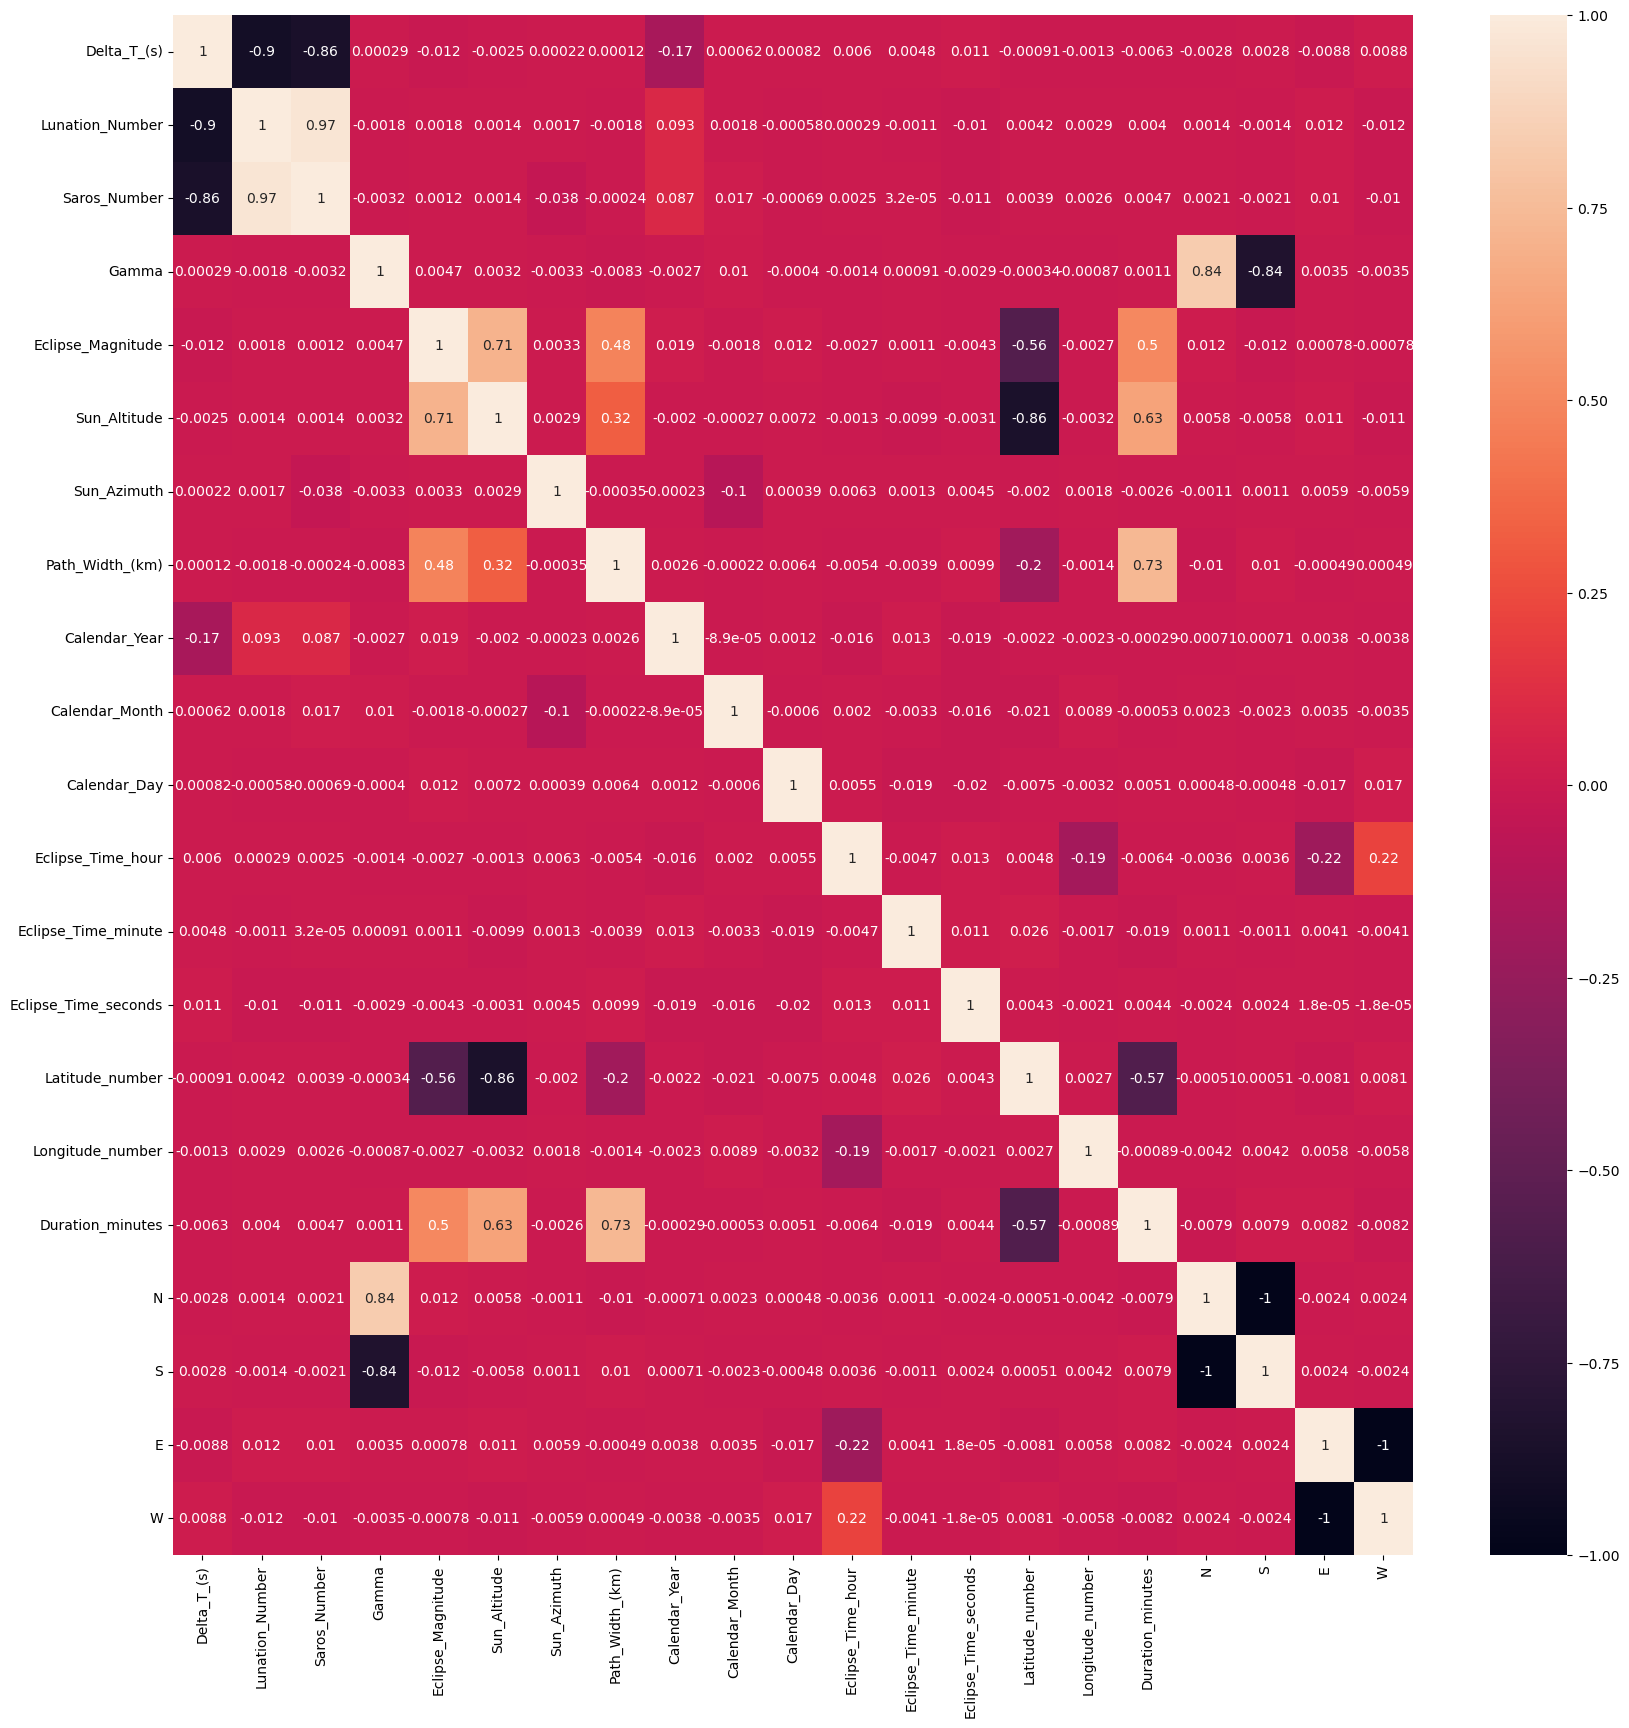

In [56]:
fig, ax = plt.subplots(figsize=(20,20))
heatmap = sns.heatmap(corr_matrix, annot =True, ax=ax)
heatmap

### Performing Feature Scaling

In [57]:
import pandas as pd
from sklearn import preprocessing

X = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(X_scaled)

In [58]:
X

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.000000,0.000000,0.113300,0.425946,0.867659,0.844444,0.058333,0.166314,0.370333,0.181818,...,1.000000,0.762712,0.389831,0.367598,0.060000,0.500000,0.0,1.0,1.0,0.0
1,0.999763,0.000097,0.137931,0.658810,0.951077,0.666667,0.419444,0.078224,0.370000,0.545455,...,0.782609,0.152542,0.271186,0.516201,0.463333,0.166667,1.0,0.0,1.0,0.0
2,0.999505,0.000194,0.162562,0.211651,0.906871,0.277778,0.205556,0.114165,0.370000,0.818182,...,0.217391,0.966102,0.050847,0.757542,0.798889,0.083333,0.0,1.0,0.0,1.0
3,0.999289,0.000275,0.000000,0.032488,0.148987,0.000000,0.780556,0.000000,0.369667,0.000000,...,0.565217,0.322034,0.949153,0.677095,0.591111,0.000000,0.0,1.0,0.0,1.0
4,0.999246,0.000291,0.187192,0.921869,0.373162,0.000000,0.152778,0.000000,0.369667,0.727273,...,0.086957,0.762712,0.593220,0.689385,0.842778,0.000000,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11579,0.095107,0.999531,0.960591,0.176201,0.905577,0.000000,0.025000,0.000000,0.740333,0.545455,...,0.608696,0.830508,0.457627,0.743017,0.180556,0.000000,0.0,1.0,0.0,1.0
11580,0.095193,0.999628,0.985222,0.908651,0.441413,0.000000,0.497222,0.000000,0.740333,0.181818,...,0.130435,0.305085,0.525424,0.750838,0.805556,0.000000,1.0,0.0,1.0,0.0
11581,0.095258,0.999709,0.822660,0.766913,0.977157,0.366667,0.405556,0.243129,0.740667,0.727273,...,1.000000,0.389831,0.966102,0.798883,0.985000,0.250000,1.0,0.0,1.0,0.0
11582,0.095408,0.999903,0.871921,0.541470,0.945344,0.911111,0.461111,0.053559,0.742000,0.000000,...,0.608696,0.305085,0.101695,0.235754,0.102222,0.166667,1.0,0.0,0.0,1.0


In [59]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X)
X_normalized = transformer.transform(X)
pd.DataFrame(X_normalized)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.377920,0.000000,0.042818,0.160973,0.327906,0.319132,0.022045,0.062853,0.139956,0.068713,...,0.377920,0.288244,0.147325,0.138922,0.022675,0.188960,0.000000,0.377920,0.377920,0.000000
1,0.388093,0.000038,0.053543,0.255740,0.369194,0.258790,0.162822,0.030365,0.143628,0.211737,...,0.303797,0.059215,0.105270,0.200381,0.179859,0.064697,0.388185,0.000000,0.388185,0.000000
2,0.360814,0.000070,0.058684,0.076405,0.327374,0.100276,0.074204,0.041213,0.133567,0.295358,...,0.078477,0.348756,0.018356,0.273467,0.288393,0.030083,0.000000,0.360993,0.000000,0.360993
3,0.395322,0.000109,0.000000,0.012852,0.058940,0.000000,0.308791,0.000000,0.146241,0.000000,...,0.223602,0.127398,0.375488,0.267861,0.233846,0.000000,0.000000,0.395604,0.000000,0.395604
4,0.369123,0.000108,0.069149,0.340540,0.137847,0.000000,0.056436,0.000000,0.136556,0.268656,...,0.032122,0.281747,0.219137,0.254660,0.311324,0.000000,0.369402,0.000000,0.000000,0.369402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11579,0.034273,0.360198,0.346166,0.063497,0.326340,0.000000,0.009009,0.000000,0.266792,0.196564,...,0.219354,0.299288,0.164914,0.267759,0.065066,0.000000,0.000000,0.360367,0.000000,0.360367
11580,0.034721,0.364607,0.359352,0.331424,0.161002,0.000000,0.181358,0.000000,0.270031,0.066317,...,0.047575,0.111277,0.191645,0.273863,0.293821,0.000000,0.364743,0.000000,0.364743,0.000000
11581,0.029470,0.309286,0.254511,0.237265,0.302309,0.113438,0.125469,0.075218,0.229145,0.225001,...,0.309376,0.120604,0.298889,0.247155,0.304736,0.077344,0.309376,0.000000,0.309376,0.000000
11582,0.034130,0.357693,0.311910,0.193699,0.338176,0.325930,0.164952,0.019159,0.265434,0.000000,...,0.217747,0.109137,0.036379,0.084336,0.036568,0.059621,0.357728,0.000000,0.000000,0.357728


### Visualization of the Target feature(Eclipse Type)

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

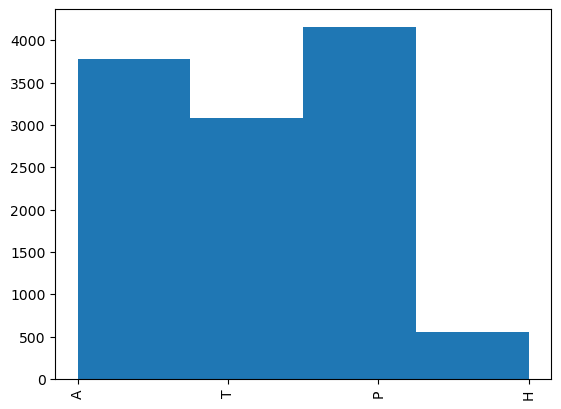

In [60]:
plt.hist(df["Eclipse_Type"], bins = len(df["Eclipse_Type"].unique()))
plt.xticks(rotation='vertical')

In [61]:
y = df['Eclipse_Type']
y.head()

1    A
2    T
3    A
4    P
5    P
Name: Eclipse_Type, dtype: object

In [62]:
y.shape

(11584,)

In [63]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()  
y = le.fit_transform(y)
y

array([0, 3, 0, ..., 3, 3, 1])

### Splitting the data

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2)

In [66]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(9267, 21) (9267,)
(2317, 21) (2317,)


## Using Logistic Regression

In [67]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression()

lg_model.fit(X_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
pd.DataFrame(y_test)

,0
0,3
1,0
2,3
3,0
4,1
...,...
2312,3
2313,2
2314,3
2315,0


In [69]:
from sklearn.metrics import classification_report, accuracy_score
predictions = lg_model.predict(pd.DataFrame(X_test))

#### Classification report

In [70]:
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       766
           1       0.60      0.13      0.21       119
           2       0.96      1.00      0.98       792
           3       0.72      0.89      0.80       640

    accuracy                           0.86      2317
   macro avg       0.80      0.70      0.71      2317
weighted avg       0.86      0.86      0.85      2317

0.8584376348726802


#### Training accuracy - 88%
#### Testing accuracy - 88.17%

## Using Random Forest Algorithm

In [71]:
from sklearn.ensemble import RandomForestClassifier

randomForestClassification = RandomForestClassifier(n_estimators=100,random_state=259)
randomForestClassification.fit(X_train, y_train)
y_pred = randomForestClassification.predict(X_test)

In [72]:
pd.Series(y_pred).value_counts()

2    792
0    776
3    635
1    114
dtype: int64

#### Classification report

In [73]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       766
           1       0.74      0.71      0.72       119
           2       1.00      1.00      1.00       792
           3       0.99      0.98      0.98       640

    accuracy                           0.96      2317
   macro avg       0.92      0.91      0.91      2317
weighted avg       0.96      0.96      0.96      2317

0.963314630988347


#### Training accuracy - 96%
#### Testing accuracy - 96.07%

In [74]:
randomForestClassification.feature_importances_

array([0.01023192, 0.00993062, 0.01021084, 0.05150094, 0.22739161,
       0.15327554, 0.01118998, 0.16092772, 0.01259017, 0.01115354,
       0.00820592, 0.00806996, 0.00847154, 0.00851578, 0.05002287,
       0.00769957, 0.15768332, 0.02257865, 0.02587903, 0.02357089,
       0.02089958])

## Using Support Vector Machine(SVM)

In [75]:
from sklearn.svm import SVC
clf = SVC(kernel='linear') 
  
clf.fit(X, y)

SVC(kernel='linear')

#### Classification report

In [76]:
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       766
           1       0.60      0.13      0.21       119
           2       0.96      1.00      0.98       792
           3       0.72      0.89      0.80       640

    accuracy                           0.86      2317
   macro avg       0.80      0.70      0.71      2317
weighted avg       0.86      0.86      0.85      2317

0.8584376348726802


#### Training accuracy - 88%
#### Testing accuracy - 88.17%

## Using XGBoost

In [77]:
import xgboost as xgb

In [78]:
XGBclassifier = xgb.XGBClassifier()
XGBclassifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [79]:
y_pred = XGBclassifier.predict(X_test)

In [80]:
pd.Series(y_pred).value_counts()

2    792
0    769
3    642
1    114
dtype: int64

#### Classification report

In [81]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       766
           1       0.82      0.78      0.80       119
           2       1.00      1.00      1.00       792
           3       0.99      1.00      0.99       640

    accuracy                           0.98      2317
   macro avg       0.94      0.94      0.94      2317
weighted avg       0.98      0.98      0.98      2317

0.9779887785930081


#### Training accuracy - 97%
#### Testing accuracy - 97.36%

## Hyperparameter Tuning using RandomisedSearchCV

In [82]:
from sklearn.model_selection import RandomizedSearchCV

In [83]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=6)]
max_depth = [int(x) for x in np.linspace(start=5,stop=30,num=4)]

In [84]:
random_params = {
    'n_estimators':n_estimators,
    'max_features':['auto','sqrt'],
    'max_depth':max_depth,
    'min_samples_split':[5,10,15,100]
}

In [85]:
random_params

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [86]:
rf = RandomForestClassifier()

In [87]:
hypertuned_classifier =  RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_params,
    cv=5,
    verbose=2,
    n_jobs=-1
)

In [88]:
hypertuned_classifier.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [89]:
hypertuned_classifier.best_params_

{'n_estimators': 540,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 21}

In [90]:
predictions = hypertuned_classifier.predict(X_test)

In [91]:
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       766
           1       0.73      0.69      0.71       119
           2       1.00      1.00      1.00       792
           3       0.99      0.98      0.99       640

    accuracy                           0.96      2317
   macro avg       0.91      0.91      0.91      2317
weighted avg       0.96      0.96      0.96      2317

0.963314630988347


#### Training accuracy - 97%
#### Testing accuracy - 96.54%

### Hyperparameter tuning using XGBoost

In [92]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [93]:
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }
    XGB = XGBClassifier()
    
    gridsearch = GridSearchCV(estimator = XGB,
                           param_grid = param_tuning,                        
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gridsearch.fit(X_train,y_train)

    return gridsearch.best_params

In [94]:
XGB = XGBClassifier(
        objective = 'reg:squarederror',
        colsample_bytree = 0.5,
        learning_rate = 0.05,
        max_depth = 6,
        min_child_weight = 1,
        n_estimators = 1000,
        subsample = 0.7)

XGB.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)

C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [95]:
y_preds = XGB.predict(X_test)

##### Confusion matrix

In [96]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_preds)
print(confusion_matrix)

[[744  20   0   2]
 [ 31  86   0   2]
 [  0   0 792   0]
 [  1   1   0 638]]


#### Classification report

In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))
print(accuracy_score(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       766
           1       0.80      0.72      0.76       119
           2       1.00      1.00      1.00       792
           3       0.99      1.00      1.00       640

    accuracy                           0.98      2317
   macro avg       0.94      0.92      0.93      2317
weighted avg       0.97      0.98      0.97      2317

0.9753992231333621
